In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import cv2 as cv
import imutils



In [2]:
def Aug_for_loops(input_list):
    
    cv_img_1 = input_list
    
    cv_img_aug_flip_trans = []

    rows, cols = cv_img_1[0].shape

    #define all four transformations
    M1 = np.float32([[1,0,50],[0,1,50]]) #linear translation... lower right corner
    M2 = np.float32([[1,0,-50],[0,1,50]]) #linear translation... lower left corner
    M3 = np.float32([[1,0,50],[0,1,-50]]) #linear translation... upper right corner
    M4 = np.float32([[1,0,-50],[0,1,-50]]) #linear translation... upper left corner

    #start augmentation
    for i in range(len(cv_img_1)):
        origin = cv_img_1[i]
        dst_ori_M1 = cv2.warpAffine(origin,M1,(cols,rows)) #applying translation to each images
        dst_ori_M2 = cv2.warpAffine(origin,M2,(cols,rows))
        dst_ori_M3 = cv2.warpAffine(origin,M3,(cols,rows))
        dst_ori_M4 = cv2.warpAffine(origin,M4,(cols,rows))

        flip = cv.flip(cv_img_1[i],1)
        dst_flip_M1 = cv2.warpAffine(flip,M1,(cols,rows))
        dst_flip_M2 = cv2.warpAffine(flip,M2,(cols,rows))
        dst_flip_M3 = cv2.warpAffine(flip,M3,(cols,rows))
        dst_flip_M4 = cv2.warpAffine(flip,M4,(cols,rows))

        #rotating images for 24 orientations...
        for angle in np.arange(0, 360, 15): 
            rotated  = imutils.rotate(origin, angle)
            rotated1 = imutils.rotate(dst_ori_M1, angle)
            rotated2 = imutils.rotate(dst_ori_M2, angle)
            rotated3 = imutils.rotate(dst_ori_M3, angle)
            rotated4 = imutils.rotate(dst_ori_M4, angle)

            rotated_flip = imutils.rotate(flip, angle)
            rotated_flip1 = imutils.rotate(dst_flip_M1, angle)
            rotated_flip2 = imutils.rotate(dst_flip_M2, angle)
            rotated_flip3 = imutils.rotate(dst_flip_M3, angle)
            rotated_flip4 = imutils.rotate(dst_flip_M4, angle)

            cv_img_aug_flip_trans.append(rotated)
            cv_img_aug_flip_trans.append(rotated1)
            cv_img_aug_flip_trans.append(rotated2)
            cv_img_aug_flip_trans.append(rotated3)
            cv_img_aug_flip_trans.append(rotated4)
            cv_img_aug_flip_trans.append(rotated_flip)
            cv_img_aug_flip_trans.append(rotated_flip1)
            cv_img_aug_flip_trans.append(rotated_flip2)
            cv_img_aug_flip_trans.append(rotated_flip3)
            cv_img_aug_flip_trans.append(rotated_flip4)
            
    return cv_img_aug_flip_trans

In [3]:
def Aug_list_comprehension(input_list):
    
    cv_img = input_list
    
    flip = [0, 1]
    
    #Linear translation

    M0 = np.float32([[1,0,0],[0,1,0]]) #linear translation... lower right corner
    M1 = np.float32([[1,0,10],[0,1,10]]) #linear translation... lower right corner
    M2 = np.float32([[1,0,-10],[0,1,10]]) #linear translation... lower left corner
    M3 = np.float32([[1,0,10],[0,1,-10]]) #linear translation... upper right corner
    M4 = np.float32([[1,0,-10],[0,1,-10]]) #linear translation... upper left corner

    M = [M0, M1, M2, M3, M4]
    
    rows, cols = cv_img[0].shape

    
    cv_img_flip = [cv.flip(item,f) for item in cv_img for f in flip]
    
    cv_img_flip_trans = [cv2.warpAffine(item, m, (cols, rows)) for item in cv_img_flip for m in M]
    
    cv_img_flip_trans_rotate = [imutils.rotate(item, angle) for item in cv_img_flip_trans 
                              for angle in np.arange(0,360, 15)]
    
    return cv_img_flip_trans_rotate

In [4]:
path = glob.glob("Edge Tear/*.bmp")

cv_img_1 = []
for img in path:
    n = cv.imread(img,0) #read gray scale image
    cv_img_1.append(n)
    
print("no of images: {}".format(len(cv_img_1)))

no of images: 5


In [5]:
import time

# start = time.time()
# cv_aug_for_loop = Aug_for_loops(cv_img_1)
# time_taken_for_loop = time.time()-start

start = time.time()
cv_aug_list_compre = Aug_list_comprehension(cv_img_1)
time_taken_list_comp = time.time()-start

# print("for loop time: {}".format(time_taken_for_loop))
print("list compre time: {}".format(time_taken_list_comp))

list compre time: 20.05714702606201


In [6]:
start = time.time()
cv_aug_for_loop = Aug_for_loops(cv_img_1)
time_taken_for_loop = time.time()-start

print("for loop time: {}".format(time_taken_for_loop))

for loop time: 43.1304669380188


In [7]:
print('compre len: {}'.format(len(cv_aug_list_compre)))
print('for len: {}'.format(len(cv_aug_for_loop)))

compre len: 1200
for len: 1200


In [8]:
def read_img(img_list, img):
    n = cv2.imread(img, 0)
    img_list.append(n)
#     print(type(img_list), type(n))
    return img_list

In [9]:
path = glob.glob("Edge Tear/*.bmp")
cv_image = []

start = time.time()
cv_image = [read_img(cv_image, img) for img in path]
#cv_image_ = [cv2.imread(file) for file in glob.glob("Edge Tear/*.bmp")]#very expensive terms of time
print(time.time()-start)

0.36602091789245605


In [10]:
len(cv_image)

5

In [11]:
type(cv_image[0])

list

In [24]:
path = glob.glob("Edge Tear/*.bmp")

cv_img_1 = []

start = time.time()
for img in path:
    n = cv.imread(img,0) #read gray scale image
    cv_img_1.append(n)
    print(type(cv_img_1), type(n))
print(time.time()-start)

<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
<class 'list'> <class 'numpy.ndarray'>
0.06600379943847656


In [25]:
type(cv_img_1)

list

In [26]:
type(cv_img_1[0])

numpy.ndarray

In [15]:
# for i, image in enumerate(cv_aug_list_compre):
#     cv.imwrite("New images/img"+str(i)+".bmp", image)

In [16]:
import os

In [17]:
directories=[d for d in os.listdir(os.getcwd()) if os.path.isdir(d)]

In [50]:
directories

['.ipynb_checkpoints',
 'Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [51]:
path = [item for item in directories[1:]]

In [52]:
path

['Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [63]:
def Aug_images(each_path):
    
#     path = each_path
    
    print('Inside: ', each_path, '...')
    
    cv_image = []

    for img in glob.glob(each_path+'/*.bmp'):
        n = cv.imread(img,0) #read gray scale image
        cv_image.append(n)
    
    print('each Image type:',type(cv_image[0]))
    print('....Images are taken from ', each_path, 'and read')
    print('\n')
    
    cv_aug_list_compre = Aug_list_comprehension(cv_image)
    
    
    
#     for i, image in enumerate(cv_aug_list_compre):
#         result = cv.imwrite(each_path+"/img"+str(i)+".bmp", image)
        
#     return result

In [64]:
result = [Aug_images(item) for item in path]

Inside:  Edge Tear ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  Edge Tear and read


Inside:  Floating Lens ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  Floating Lens and read


Inside:  Folded Lens ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  Folded Lens and read


Inside:  Gapped Edge ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  Gapped Edge and read


Inside:  In Lens Tear ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  In Lens Tear and read


Inside:  Multiple Lens ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  Multiple Lens and read


Inside:  No Lens ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  No Lens and read


Inside:  No Shell ...
each Image type: <class 'numpy.ndarray'>
....Images are taken from  No Shell and read


Inside:  Particles ...
each Image type: <class 'numpy.ndarray'>
....Images are t

In [54]:
[item for item in path]

['Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [1]:
import os

In [4]:
os.listdir() #list of directories

['.ipynb_checkpoints',
 'Augmentation.ipynb',
 'aug_optimising.ipynb',
 'data_reshape_rotate.ipynb',
 'Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'Image_Augmentation.ipynb',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [5]:
os.getcwd() #gets current working directory path

'C:\\Users\\aim\\play'

In [6]:
os.listdir('D:\\')

['$RECYCLE.BIN',
 '.csv',
 '.pdf',
 'Appraisal.pdf',
 'Atl latest version spell check',
 'Biotroniks',
 'BOOTCAMP (C) - Shortcut.lnk',
 'bootcamp5.1.5769',
 'camera settings11217.prproj',
 'CLMI',
 'CLMI Configs',
 'CLMI Configs.txt',
 'CLMI Images',
 'DESInspection Configs',
 'eula.1028.txt',
 'eula.1031.txt',
 'eula.1033.txt',
 'eula.1036.txt',
 'eula.1040.txt',
 'eula.1041.txt',
 'eula.1042.txt',
 'eula.2052.txt',
 'eula.3082.txt',
 'example',
 'globdata.ini',
 'Halcon 12.0.2',
 'halcon-13.0.1-windows.exe',
 'IA_ENG copy .xlsx',
 'install.exe',
 'install.ini',
 'install.res.1028.dll',
 'install.res.1031.dll',
 'install.res.1033.dll',
 'install.res.1036.dll',
 'install.res.1040.dll',
 'install.res.1041.dll',
 'install.res.1042.dll',
 'install.res.2052.dll',
 'install.res.3082.dll',
 'IPIe Work list.xls',
 'lec29.pdf',
 'lens',
 'LS3 LPC Documents List.xls',
 'msdia80.dll',
 'ReleaseVer1.0.0.5_30_07_2018.7z',
 'System Volume Information',
 'Test.txt',
 'tested',
 'use tis details.txt'

In [18]:
os.path.isdir('No Shell/')

True

In [20]:
os.path.isdir('tested')

False

In [35]:
os.getcwd()

'C:\\Users\\aim\\play'

In [40]:
directory = os.getcwd()+'\Edge Tear/'

In [41]:
print(directory)

C:\Users\aim\play\Edge Tear/


In [43]:
os.walk(directory)

<generator object walk at 0x00000000069B20C0>


In [109]:
for r, d, f in os.walk(directory):
    print(directory)
    for file in f:
        if '.bmp' in file:
            #files.append(os.path.join(r, file))
            print(file)

C:\Users\aim\play\Edge Tear/
LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-29 14-47-30.562 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-30 11-11-11.635 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-31 10-44-33.700 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-31 11-06-37.058 M1 T3 1 0.bmp


In [49]:
for r, d, f in os.walk(directory):
    for file in f:
        if '.txt' in file:
            #files.append(os.path.join(r, file))
            print(file)

New Text Document.txt


In [68]:
directory_1 = [d for d in os.listdir(os.getcwd()) if os.path.isdir(d)]

In [69]:
directory_1

['.ipynb_checkpoints',
 'Edge Tear',
 'Floating Lens',
 'Folded Lens',
 'Gapped Edge',
 'In Lens Tear',
 'Multiple Lens',
 'No Lens',
 'No Shell',
 'Particles']

In [91]:
directory_1[3]

'Folded Lens'

In [118]:
def read_img(direct):
    #direct = os.getcwd()+'\\'+ direct+'/'
    print('inside ', direct)
    for r, d, f in os.walk(direct):
        for file in f:
            if '.bmp' in file:
                print(file)

In [185]:
for r, d, f in os.walk(directory_1[1]):
        for file in f:
            print(file)

LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-29 14-47-30.562 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-30 11-11-11.635 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-31 10-44-33.700 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-31 11-06-37.058 M1 T3 1 0.bmp
New Text Document.txt


In [120]:
result = [read_img(d) for d in directory_1]
print('total no of files read..', len(result))

inside  .ipynb_checkpoints
inside  Edge Tear
LS3_LPC 13 2019-05-28 11-32-21.330 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-29 14-47-30.562 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-30 11-11-11.635 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-31 10-44-33.700 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-31 11-06-37.058 M1 T3 1 0.bmp
inside  Floating Lens
LS3_LPC 13 2019-05-28 10-35-59.953 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-28 10-36-00.385 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-28 11-13-20.479 M1 T2 1 0.bmp
LS3_LPC 13 2019-05-28 12-27-10.277 M1 T2 1 0.bmp
LS3_LPC 13 2019-05-28 12-27-10.613 M1 T2 1 0.bmp
inside  Folded Lens
LS3_LPC 13 2019-05-28 11-32-24.690 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-28 11-52-49.349 M1 T2 1 0.bmp
LS3_LPC 13 2019-05-28 13-51-22.141 M1 T3 1 0.bmp
LS3_LPC 13 2019-05-28 14-11-11.636 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-28 14-37-47.525 M1 T2 1 0.bmp
inside  Gapped Edge
LS3_LPC 13 2019-05-28 10-40-39.284 M1 T7 1 0.bmp
LS3_LPC 13 2019-05-29 14-44-33.646 M1 T4 1 0.bmp
LS3_LPC 13 2019-05-29 15-29-01.772 M1 T4 1 0.bmp
LS3_LPC 13 

In [141]:
ex = []

In [142]:
len(ex) == False

True

In [144]:
if len(ex) == 0:
    print('Nil')
else:
    print('OK')

Nil


In [168]:
import numpy as np
n1 = [1, 2, 3]
n2 = np.array([4, 5, 6])

In [169]:
n1.append(n2)

In [170]:
n1

[1, 2, 3, array([4, 5, 6])]

In [171]:
n3 = [np.array([1]), np.array([2])]

In [172]:
n1.append(n3)

In [173]:
n1

[1, 2, 3, array([4, 5, 6]), [array([1]), array([2])]]

In [174]:
n1[0]

1

In [175]:
n1[3]

array([4, 5, 6])

In [176]:
n1[4]

[array([1]), array([2])]

In [177]:
len(n1)

5

In [180]:
n4 = np.arange(100,112)

In [181]:
for i,n in enumerate(n4):
    print(n)

100
101
102
103
104
105
106
107
108
109
110
111


In [203]:
os.getcwd()+'\\'+directory_1[5]

'C:\\Users\\aim\\play\\In Lens Tear'

In [206]:
cv_im = []
import matplotlib.pyplot as plt
for r,d,f in os.walk(os.getcwd()+'\\'+directory_1[5]):
    for file in f:
        if '.bmp' in file:
            n = cv2.imread(file,0)
            print(n)
            print(file)
            print(type(file))

None
LS3_LPC 13 2019-05-28 10-35-32.847 M1 T1 1 0.bmp
<class 'str'>
None
LS3_LPC 13 2019-05-28 10-35-59.058 M1 T1 1 0.bmp
<class 'str'>


In [211]:
n
for r, d, f in os.walk(directory_1[5]):
    for file in f:
        print(file)
        n = file

LS3_LPC 13 2019-05-28 10-35-32.847 M1 T1 1 0.bmp
LS3_LPC 13 2019-05-28 10-35-59.058 M1 T1 1 0.bmp


In [212]:
n

'LS3_LPC 13 2019-05-28 10-35-59.058 M1 T1 1 0.bmp'

In [213]:
type(n)

str

In [215]:
img_1 = cv2.imread(n,0)

In [217]:
type(img_1)

NoneType

In [223]:
img_1 = cv2.imread(directory_1[5]+'\\'+n,0)

In [224]:
type(img_1)

numpy.ndarray

In [222]:
directory_1[5]+'\\'+n

'In Lens Tear\\LS3_LPC 13 2019-05-28 10-35-59.058 M1 T1 1 0.bmp'

In [233]:
import imutils

In [236]:
cv_im = []
import matplotlib.pyplot as plt
for r,d,f in os.walk(directory_1[5]):
    for file in f:
        if '.bmp' in file:
            n = cv2.imread(directory_1[5]+'\\'+file,0)
            cv_im.append(n)
            n = cv2.flip(n, 1)
            cv_im.append(n)
            #plt.imshow(n, cmap='gray')
            

In [237]:
len(cv_im)

4

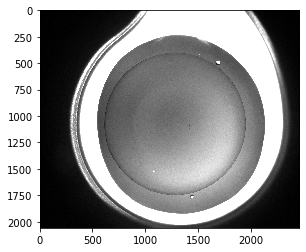

In [231]:
plt.imshow(cv_im[0], 'gray')

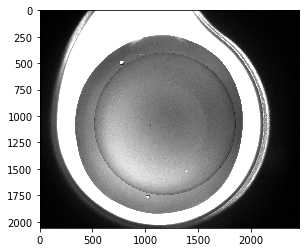

In [232]:
plt.imshow(cv_im[1], 'gray')

In [238]:
cv_im_1 = []
import matplotlib.pyplot as plt
for r,d,f in os.walk(directory_1[5]):
    for file in f:
        if '.bmp' in file:
            n = cv2.imread(directory_1[5]+'\\'+file,0)
            cv_im_1.append([imutils.rotate(n,angle) for angle in np.arange(0,360,90)])

In [239]:
print(len(cv_im_1))
print(len(cv_im_1[0]))

2
4


In [240]:
import time

In [262]:
start = time.time()
for_rote = []
for i, img in enumerate(cv_im):
    for angle in range(0,360,90):
        for_rote.append(imutils.rotate(img, angle))
        
print('time taken ', time.time()-start)
print('length of original list ',len(cv_im))
print('lenth of rotated list ', len(for_rote))


time taken  0.31201791763305664
length of original list  4
lenth of rotated list  16


In [263]:
start = time.time()
list_compre = [imutils.rotate(image, angel) for image in cv_im for angel in np.arange(0,360,90)]

print('time taken', time.time()-start)
print('length of original list ', len(cv_im))
print('length of rotate list', len(list_compre))

time taken 0.3210182189941406
length of original list  4
length of rotate list 16
